<a href="https://colab.research.google.com/github/dawsond-smu/Portfolio/blob/master/NYC_Flights_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NYC Flights Data Merge




In [1]:
#Mount your Google Drive to pull in and set the wd to it. I'd like to build a Github for this location to copy it over by 1/16/2021
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive

Mounted at /content/gdrive
/content/gdrive/My Drive


In [2]:
# Python Packages
modnames = "pandas numpy matplotlib altair seaborn plotly sklearn tensorflow statsmodels".split()
for lib in modnames:
    globals()[lib] = __import__(lib)

In [3]:
#Use R Code within Python --> So Thankful for this!!!
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning:

pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning:

pandas >= 1.0 is not supported.



In [ ]:
# What system is R using
%%R
devtools::session_info(c("tidyverse"))

In [5]:
# Pacman will allow us to install & allow load lots of packages for R at once
%%R
install.packages("pacman")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pacman_0.5.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 274400 bytes (267 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [6]:
#R Packages
%%R
pacman::p_load(DataExplorer,skimr,dplyr,caret,GGally,ggpairs,e1071,class,gdata,knitr,shiny,anytime,plotly,forecast,data.table,car,substr,mctest,nycflights13)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘plyr’, ‘igraph’, ‘data.table’, ‘reshape2’, ‘gridExtra’, ‘networkD3’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =

In [121]:
%%R 
str(flights)  

tibble [336,776 × 19] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:336776] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:336776] 515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num [1:336776] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int [1:336776] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:336776] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num [1:336776] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr [1:336776] "UA" "UA" "AA" "B6" ...
 $ flight        : int [1:336776] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr [1:336776] "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr [1:336776] "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : ch

In [122]:
%%R
skim(flights) 

── Data Summary ────────────────────────
                           Values 
Name                       flights
Number of rows             336776 
Number of columns          19     
_______________________           
Column type frequency:            
  character                4      
  numeric                  14     
  POSIXct                  1      
________________________          
Group variables            None   

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 carrier               0         1         2     2     0       16          0
2 tailnum            2512         0.993     5     6     0     4043          0
3 origin                0         1         3     3     0        3          0
4 dest                  0         1         3     3     0      105          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable  n_

Let's see what the data looks like for flights Over 15 minutes Delayed

In [123]:
%%R
flights %>% filter(arr_delay > 15) %>% skim()

── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             77630     
Number of columns          19        
_______________________              
Column type frequency:               
  character                4         
  numeric                  14        
  POSIXct                  1         
________________________             
Group variables            None      

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 carrier               0             1     2     2     0       16          0
2 tailnum               0             1     5     6     0     3737          0
3 origin                0             1     3     3     0        3          0
4 dest                  0             1     3     3     0      103          0

── Variable type: numeric ──────────────────────────────────────────

In [124]:
%%R
delays <- flights %>% 
  na.omit() %>%
  mutate_if(sapply(flights, is.character), as.factor) %>%
  mutate(On_Time = as.factor(case_when(
      abs(arr_delay) <= 15 ~ "Y",
      TRUE ~ "N")),
      Date = anydate(time_hour),
      year = as.factor(year),
      month = as.factor(month),
      day = as.factor(day))
str(delays)

tibble [327,346 × 21] (S3: tbl_df/tbl/data.frame)
 $ year          : Factor w/ 1 level "2013": 1 1 1 1 1 1 1 1 1 1 ...
 $ month         : Factor w/ 12 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : Factor w/ 31 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:327346] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:327346] 515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num [1:327346] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int [1:327346] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:327346] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num [1:327346] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : Factor w/ 16 levels "9E","AA","AS",..: 12 12 2 4 5 12 4 6 4 2 ...
 $ flight        : int [1:327346] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : Factor w/ 4037 levels "D942DN","N0EGMQ",..: 180 524 2400 3201 2660 1141 1828 329

R[write to console]: `summarise()` has grouped output by 'Date', 'carrier'. You can override using the `.groups` argument.



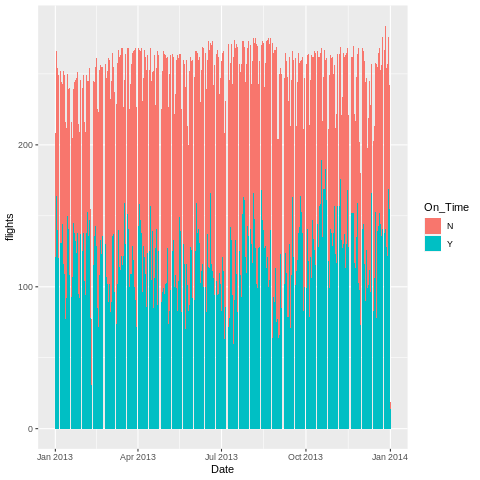

In [146]:
%%R
delays_graph <- delays %>%
  group_by(Date,carrier,On_Time) %>% 
  summarize(flights=n()) %>%
  filter(carrier %in% c("AA","DL","WN"))
head(delays_graph)
# # Stacked
ggplot(delays_graph, aes(fill = On_Time, x=Date, y=flights)) + 
  geom_bar(position = "stack", stat = "identity")

In [126]:
%%R
delays_graph_Y <- delays %>%
  group_by(Date,carrier,On_Time) %>% 
  summarize(flights_on_time=n()) %>%
  filter(On_Time == "Y", carrier %in% c("AA","DL","WN"))
head(delays_graph_Y)

R[write to console]: `summarise()` has grouped output by 'Date', 'carrier'. You can override using the `.groups` argument.



# A tibble: 6 x 4
# Groups:   Date, carrier [6]
  Date       carrier On_Time flights_on_time
  <date>     <fct>   <fct>             <int>
1 2013-01-01 AA      Y                    46
2 2013-01-01 DL      Y                    64
3 2013-01-01 WN      Y                    11
4 2013-01-02 AA      Y                    54
5 2013-01-02 DL      Y                    87
6 2013-01-02 WN      Y                    23


In [127]:
%%R
delays_graph_total <- delays %>%
  group_by(Date,carrier) %>% 
  summarize(flights=n()) %>%
  filter(carrier %in% c("AA","DL","WN"))
head(delays_graph_total)

R[write to console]: `summarise()` has grouped output by 'Date'. You can override using the `.groups` argument.



# A tibble: 6 x 3
# Groups:   Date [2]
  Date       carrier flights
  <date>     <fct>     <int>
1 2013-01-01 AA           84
2 2013-01-01 DL          100
3 2013-01-01 WN           24
4 2013-01-02 AA           91
5 2013-01-02 DL          141
6 2013-01-02 WN           34


In [128]:
%%R
joined_by_carrier = delays_graph_Y %>% 
  inner_join(delays_graph_total, by = c("Date","carrier")) %>%
  mutate(on_time_pct = round(flights_on_time/flights,2)) %>%
  select(-On_Time,-flights_on_time)
write.csv(joined_by_carrier,"\\flights_Date_by_carrier.csv", row.names = TRUE)
head(joined_by_carrier)

# A tibble: 6 x 4
# Groups:   Date, carrier [6]
  Date       carrier flights on_time_pct
  <date>     <fct>     <int>       <dbl>
1 2013-01-01 AA           84        0.55
2 2013-01-01 DL          100        0.64
3 2013-01-01 WN           24        0.46
4 2013-01-02 AA           91        0.59
5 2013-01-02 DL          141        0.62
6 2013-01-02 WN           34        0.68


R[write to console]: `geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



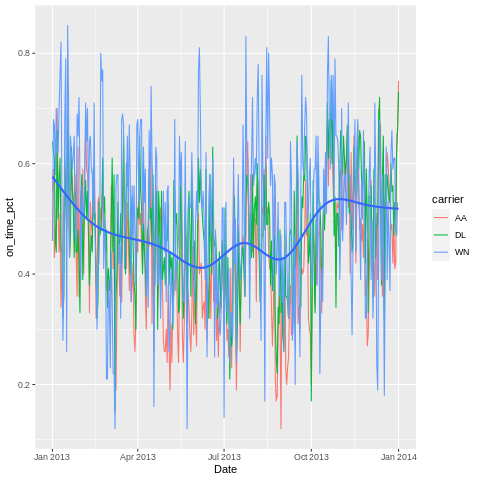

In [129]:
%%R
ggplot(data=joined_by_carrier, mapping=aes(x=Date, y=on_time_pct))+
  geom_line(aes(color = carrier)) +
  geom_smooth(se=FALSE)

R[write to console]: Adding missing grouping variables: `Date`

R[write to console]: `summarise()` has grouped output by 'month_floor'. You can override using the `.groups` argument.

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



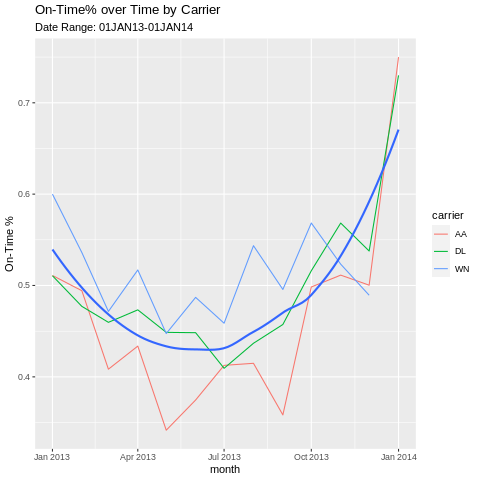

In [156]:
%%R
monthStart <- function(x) {
  x <- as.POSIXlt(x)
  x$mday <- 1
  as.Date(x)
}
on_time_pct_by_month <- joined_by_carrier %>%
  mutate(month_floor = monthStart(Date)) %>%
  select(-Date) %>%
  group_by(month_floor,carrier) %>% 
  summarize(on_time_pct=mean(on_time_pct)) 
head(on_time_pct_by_month)
ggplot(data=on_time_pct_by_month, mapping=aes(x=month_floor, y=on_time_pct))+
  geom_line(aes(color = carrier)) +
  geom_smooth(se=FALSE) +
  xlab('month') +
  ylab('On-Time %') +
  labs(title='On-Time% over Time by Carrier',
       subtitle='Date Range: 01JAN13-01JAN14')

In [131]:
%%R
write.csv(airlines,"\\airlines.csv", row.names = TRUE)
skim(airlines) 

── Data Summary ────────────────────────
                           Values  
Name                       airlines
Number of rows             16      
Number of columns          2       
_______________________            
Column type frequency:             
  character                2       
________________________           
Group variables            None    

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 carrier               0             1     2     2     0       16          0
2 name                  0             1     9    27     0       16          0


In [132]:
%%R
write.csv(airports,"\\airports.csv", row.names = TRUE)
skim(airports)

── Data Summary ────────────────────────
                           Values  
Name                       airports
Number of rows             1458    
Number of columns          8       
_______________________            
Column type frequency:             
  character                4       
  numeric                  4       
________________________           
Group variables            None    

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 faa                   0         1         3     3     0     1458          0
2 name                  0         1         4    51     0     1440          0
3 dst                   0         1         1     1     0        3          0
4 tzone                 3         0.998    14    19     0        9          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate    me

In [133]:
%%R
write.csv(planes,"\\planes.csv", row.names = TRUE)
skim(planes)

── Data Summary ────────────────────────
                           Values
Name                       planes
Number of rows             3322  
Number of columns          9     
_______________________          
Column type frequency:           
  character                5     
  numeric                  4     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 tailnum               0             1     5     6     0     3322          0
2 type                  0             1    10    24     0        3          0
3 manufacturer          0             1     4    29     0       35          0
4 model                 0             1     2    18     0      127          0
5 engine                0             1     7    13     0        6          0

── Variable type: numeric ──────────────────────────────────────────

In [134]:
%%R
skim(weather)
weather_modified = weather %>%
  mutate(Date = anydate(time_hour),
      year = as.factor(year),
      month = as.factor(month),
      day = as.factor(day))
write.csv(weather_modified,"\\weather.csv", row.names = TRUE)
skim(weather_modified)

── Data Summary ────────────────────────
                           Values          
Name                       weather_modified
Number of rows             26115           
Number of columns          16              
_______________________                    
Column type frequency:                     
  character                1               
  Date                     1               
  factor                   3               
  numeric                  10              
  POSIXct                  1               
________________________                   
Group variables            None            

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 origin                0             1     3     3     0        3          0

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        media

Let's bring the data back into the Python Environment

In [135]:
flights = %R flights   
weather = %R weather_modified
planes = %R planes
airports = %R airports
airlines = %R airlines
flights.describe()  
  
weather.describe()   

,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,Date
count,26115.000000,26114.000000,26114.000000,26114.000000,25655.000000,26111.000000,5337.000000,26115.000000,23386.000000,26115.000000,26115.000000
mean,11.490791,55.260392,41.439985,62.530059,199.761060,10.517488,25.487071,0.004469,1017.898751,9.255372,15887.455064
std,6.912423,17.787852,19.386236,19.395918,107.306847,8.539253,5.954958,0.030154,7.423827,2.055052,104.991271
min,0.000000,10.940000,-9.940000,12.740000,0.000000,0.000000,16.110920,0.000000,983.800000,0.000000,15706.000000
25%,6.000000,39.920000,26.060000,47.050000,120.000000,6.904680,20.714040,0.000000,1012.900000,10.000000,15797.000000
50%,11.000000,55.400000,42.080000,61.790000,220.000000,10.357020,24.166380,0.000000,1017.600000,10.000000,15887.000000
75%,17.000000,69.980000,57.920000,78.790000,290.000000,13.809360,28.769500,0.000000,1023.000000,10.000000,15978.000000
max,23.000000,100.040000,78.080000,100.000000,360.000000,1048.360580,66.745240,1.210000,1042.100000,10.000000,16069.000000
